In [1]:
import pandas as pd # procesarea setului de date
import seaborn as sns # pentru vizualizarea statistica a datelor
import numpy as np # algebra liniara
import matplotlib.pyplot as plt # vizualizarea datelor
#rezultatele sunt salvate ca outputuri
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#incarcam datele
data = pd.read_csv('D:/Facultate/Sisteme inteligente in economie/Proiect_Machine_Learning/car_evaluation.csv')

In [3]:
#vedem cum arata setul de date
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
#vedem cum arata coloanele
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
#redenumim coloanele pentru o mai buna intelegere a variabilelor
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
data.columns=col_names

In [6]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,more,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
#vedem valorile pe care le poate lua o variabila in functie de coloana
column = data[['buying','maint','doors','persons','lug_boot','safety','decision']]
for x in column:
    print(x," :",set(data[x]))

buying  : {'med', 'vhigh', 'low', 'high'}
maint  : {'med', 'vhigh', 'low', 'high'}
doors  : {'5more', '2', '4', '3'}
persons  : {'more', '2', '4'}
lug_boot  : {'small', 'big', 'med'}
safety  : {'med', 'low', 'high'}
decision  : {'unacc', 'acc', 'vgood', 'good'}


In [8]:
for col in col_names:
    
    print(data[col].value_counts()) 
    
# va trebui sa tranformam toate atributele coloanelor in atribute de tip numeric
# observam ca variabilele sunt distribuite egal pe atribute,cu exceptia variabilei de decizie

med      432
low      432
high     432
vhigh    431
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    431
Name: maint, dtype: int64
5more    432
4        432
3        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [9]:
data.shape

(1727, 7)

In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
#observam ca variabilele sunt de tip obiect, adica categorice
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   decision  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
#verificam daca sunt valori care lipsesc
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
decision    0
dtype: int64

In [13]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'decision'],
      dtype='object')

(array([1209.,    0.,    0.,  384.,    0.,    0.,   65.,    0.,    0.,
          69.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

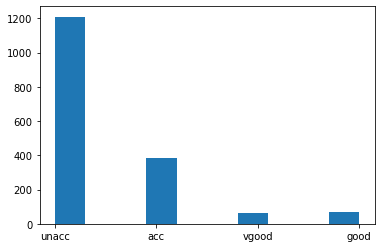

In [14]:
#punem in evidenta variabila pe care o vom prezice (variabila dependenta)
plt.hist(data['decision'])
#observam ca cele mai multe masini sunt neacceptate

In [15]:
#creem o noua baza de date in care valorile variabilelor sa fie numerice
#vom considera dedizia finala ca fiind acceptata (acc,good,vgood - notate cu 1) sau neacceptata (unacc - notata cu 0)
data_label = data.copy()
data_label['decision'].replace(['unacc','acc','good','vgood'],[0,1,1,1], inplace=True) 
data_label['buying'].replace(['vhigh', 'med', 'low', 'high'],[3,1,0,2], inplace=True) 
data_label['maint'].replace(['vhigh', 'med', 'low', 'high'],[3,1,0,2], inplace=True) 
data_label['doors'].replace(['4', '5more', '3', '2'],[2,3,1,0], inplace=True) 
data_label['persons'].replace(['4', 'more', '2'],[1,2,0], inplace=True) 
data_label['lug_boot'].replace(['small', 'med', 'big'],[0,1,2], inplace=True)
data_label['safety'].replace(['low', 'med', 'high'],[0,1,2], inplace=True)
data_label.tail()

,buying,maint,doors,persons,lug_boot,safety,decision
1722,0,0,3,2,1,1,1
1723,0,0,3,2,1,2,1
1724,0,0,3,2,2,0,0
1725,0,0,3,2,2,1,1
1726,0,0,3,2,2,2,1


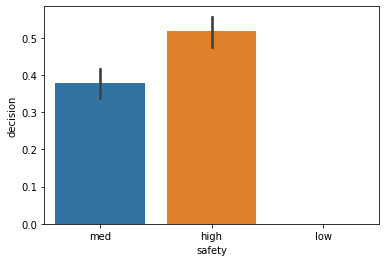

In [16]:
#Grafic care arata șansa de acceptabilitate in functie de gradul de siguranță 
#Observam ca cu cat gradul de siguranta este mai mare, cu atat prbabilitatea de acceptabilitate este mai mare
sns.barplot(data["safety"],data_label["decision"])

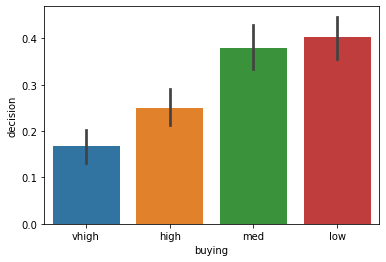

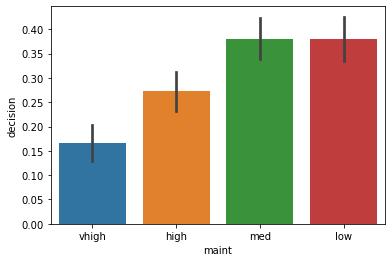

In [17]:
#Grafic care arata șansa de acceptabilitate in functie de pret si intretinere/suport
plt.figure("buy")
sns.barplot(data["buying"],data_label["decision"])
plt.figure("maint")
sns.barplot(data["maint"],data_label["decision"])

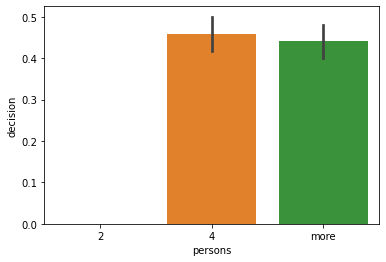

In [18]:
#Grafic care arata șansa de acceptabilitate in functie de nr de locuri in masina
#Observam ca cu cat masina este facuta pentru mai mult de 2 persoane, cu atat prbabilitatea de acceptabilitate este mai mare
sns.barplot(data["persons"],data_label["decision"])

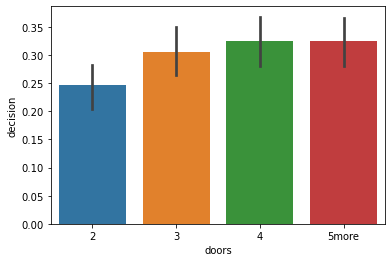

In [19]:
##Grafic care arata șansa de acceptabilitate in functie de nr de usi/portiere la masina
# Cu cat sunt mai multe usi, cu atat sansa de ca masina sa fie acceptata crete
sns.barplot(data["doors"],data_label["decision"])

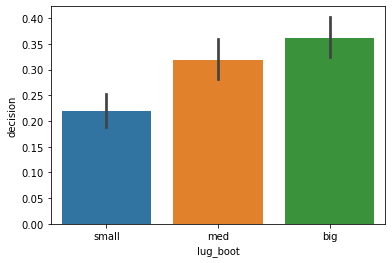

In [20]:
###Grafic care arata șansa de acceptabilitate in functie de marimea portbagajului
#Cu cat portbagajul este mai mare, sansele de acceptabilitate sunt mai mari
sns.barplot(data["lug_boot"],data_label["decision"])

In [21]:
#Atribuim datasetului initial caracteristicile datasetului anterior creat
#in care valorile variabilelor sunt numerice

data=data_label

In [22]:
#declaram variabila dependenta (decizia) 
#si variabilele independente (toate celelalte - buying  maint  doors  persons  lug_boot  safety)

X = data.drop(['decision'], axis=1)

y = data['decision']

In [23]:
#Vedem cum arata X si y

X, y

(      buying  maint  doors  persons  lug_boot  safety
 0          3      3      0        0         0       1
 1          3      3      0        0         0       2
 2          3      3      0        0         1       0
 3          3      3      0        0         1       1
 4          3      3      0        0         1       2
 ...      ...    ...    ...      ...       ...     ...
 1722       0      0      3        2         1       1
 1723       0      0      3        2         1       2
 1724       0      0      3        2         2       0
 1725       0      0      3        2         2       1
 1726       0      0      3        2         2       2
 
 [1727 rows x 6 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1722    1
 1723    1
 1724    0
 1725    1
 1726    1
 Name: decision, Length: 1727, dtype: int64)

In [24]:
# impartim setul de date in 2 parti : pentru antrenare (80%) si pentru test (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [25]:
# verificam forma datelor 
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [26]:
# verificam formatul datelor
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [27]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1648,0,0,1,0,0,2
1465,0,2,2,0,2,2
361,3,0,1,1,0,2
315,3,1,3,2,0,1
1372,0,3,2,2,1,2


In [28]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,0,3,0,2,1,2
124,3,2,0,1,2,2
648,2,1,0,0,0,1
249,3,1,1,0,2,1
1598,0,1,3,0,2,0


In [29]:
y_test.head()

1318    1
124     0
648     0
249     0
1598    0
Name: decision, dtype: int64

In [30]:
y_train.head()

1648    0
1465    0
361     1
315     0
1372    1
Name: decision, dtype: int64

In [31]:
#o alta modalitate de a tranforma atributele in date de tim numeric
# import category encoders

#import category_encoders as ce

# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

#X_train = encoder.fit_transform(X_train)

#X_test = encoder.transform(X_test)

#encoder2 = ce.OrdinalEncoder(cols=['class'])

#y_train = encoder2.fit_transform(y_train)

#y_test = encoder2.transform(y_test)

#X_train.head()

#X_test.head()

In [32]:
#scalam valorile numerice cu un Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#algoritmul DecisionTree pt clasificare
from sklearn.tree import DecisionTreeClassifier

In [34]:
#un indicator de masurare a acuratetei modelului 
from sklearn.metrics import mean_absolute_error

In [35]:
dtc_model = DecisionTreeClassifier()

#antrenarea datelor
dtc_model.fit(X_train, y_train)

# obtinere predictii pt valoarea variabilei y
val_predictions_dtc = dtc_model.predict(X_test)


In [36]:
#confusion matrix, indicator de evaluare a acuratetei modelului
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test, val_predictions_dtc)

In [37]:
from sklearn.metrics import f1_score

In [38]:
#functii de evaluare a acuratetei modelului
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

score_dtc=accuracy_score(y_test,val_predictions_dtc)

print(score_dtc)
print(cm_dtc)
print(classification_report(y_test,val_predictions_dtc))
print("MAE is: ",mean_absolute_error(y_test, val_predictions_dtc))
print("The score on the trained data is :",dtc_model.score(X_train,y_train))
print("The score on the tested data is :",dtc_model.score(X_test,y_test))



0.9913294797687862
[[239   0]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       239
           1       1.00      0.97      0.99       107

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346

MAE is:  0.008670520231213872
The score on the trained data is : 1.0
The score on the tested data is : 0.9913294797687862


In [39]:
#algoritmul KNeighbors

from sklearn.neighbors import KNeighborsClassifier

#antrenarea datelor 

knc_model = KNeighborsClassifier()

knc_model.fit(X_train,y_train)

# obtinere predictii pt valoarea variabilei y

val_predictions_knc = knc_model.predict(X_test) 

cm_knc = confusion_matrix(y_test, val_predictions_knc)
score_knc=accuracy_score(y_test,val_predictions_knc)

print(score_knc)
print(cm_knc) 
print(classification_report(y_test, val_predictions_knc)) 
print("The score on the trained data is :",knc_model.score(X_train,y_train))
print("The score on the tested data is :",knc_model.score(X_test,y_test))

score_knc=f1_score(y_test,val_predictions_knc, average='macro')
print(score_knc)

0.9826589595375722
[[239   0]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       239
           1       1.00      0.94      0.97       107

    accuracy                           0.98       346
   macro avg       0.99      0.97      0.98       346
weighted avg       0.98      0.98      0.98       346

The score on the trained data is : 0.997827661115134
The score on the tested data is : 0.9826589595375722
0.9793785759694851


In [40]:
#algoritmul Naives Bayes

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

# obtinere predictii pt valoarea variabilei y

val_predictions_nb=clf.predict(X_test)

cm_nb = confusion_matrix(y_test, val_predictions_nb)
score_nb=accuracy_score(y_test,val_predictions_nb)

print(score_nb) 
print("MAE: ", mean_absolute_error(y_test,val_predictions_nb))
print(cm_nb)
print(classification_report(y_test, val_predictions_nb)) 
print("The score on the trained data is :",clf.score(X_train,y_train))
print("The score on the tested data is :",clf.score(X_test,y_test))




0.8872832369942196
MAE:  0.11271676300578035
[[226  13]
 [ 26  81]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       239
           1       0.86      0.76      0.81       107

    accuracy                           0.89       346
   macro avg       0.88      0.85      0.86       346
weighted avg       0.89      0.89      0.89       346

The score on the trained data is : 0.8855901520637219
The score on the tested data is : 0.8872832369942196


In [41]:
#algortmul RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=1)

# antreanarea datelor

rfc_model.fit(X_train, y_train)

# obtinere predictii pt valoarea variabilei y

val_predictions_rfc = rfc_model.predict(X_test)

cm_rfc = confusion_matrix(y_test, val_predictions_rfc)

score_rfc=accuracy_score(y_test,val_predictions_rfc)
print(score_rfc)
print("MAE: ", mean_absolute_error(y_test,val_predictions_rfc))
print(cm_rfc)
print(classification_report(y_test,val_predictions_rfc))
print("The score on the trained data is :",rfc_model.score(X_train,y_train))
print("The score on the tested data is :",rfc_model.score(X_test,y_test))



0.9942196531791907
MAE:  0.005780346820809248
[[239   0]
 [  2 105]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       239
           1       1.00      0.98      0.99       107

    accuracy                           0.99       346
   macro avg       1.00      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346

The score on the trained data is : 1.0
The score on the tested data is : 0.9942196531791907


In [42]:
# vedem scorurile pentru variabilele independente
#observam ca nr de usi are cel mai mic scor in stabilirea acceptabilitatii

feature_scores = pd.Series(rfc_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

safety      0.346182
persons     0.304353
maint       0.117775
buying      0.114348
lug_boot    0.071120
doors       0.046222
dtype: float64

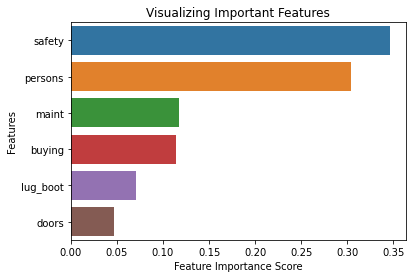

In [43]:
# creem un grafic de tip bar pentru vizualizarea scorurilor

sns.barplot(x=feature_scores, y=feature_scores.index)


# adaugam etichete pe axe

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


# adaugam titlul graficului

plt.title("Visualizing Important Features")


# vizualizam graficul

plt.show()

In [44]:
#incercam sa vedem daca prin eliminarea variabilei 'nr. de usi' 'doors' acuratetea modelului va creste

X = data.drop(['decision', 'doors'], axis=1)
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)



In [45]:
X_train.head()

,buying,maint,persons,lug_boot,safety
107,3,2,0,0,0
900,1,3,1,0,1
1708,0,0,0,2,2
705,2,1,0,1,1
678,2,1,0,1,1


In [46]:
X_test.head()

,buying,maint,persons,lug_boot,safety
599,2,2,0,2,0
932,1,3,1,2,0
628,2,2,0,2,2
1497,0,2,1,1,1
1262,1,0,2,1,0


In [47]:
rfc_model2 = RandomForestClassifier(random_state=0)

rfc_model2.fit(X_train, y_train)


val_predictions_rfc2 = rfc_model2.predict(X_test)

 
cm_rfc2 = confusion_matrix(y_test, val_predictions_rfc2)

print(accuracy_score(y_test,val_predictions_rfc2))
print(cm_rfc2)
print(classification_report(y_test,val_predictions_rfc2))
print('MAE with doors variable removed ',mean_absolute_error(y_test, val_predictions_rfc2))
print("The score on the trained data with doors variable removed is :",rfc_model2.score(X_train,y_train))
print("The score on the tested data with doors variable removed is :",rfc_model2.score(X_test,y_test))



0.976878612716763
[[233   4]
 [  4 105]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       237
           1       0.96      0.96      0.96       109

    accuracy                           0.98       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346

MAE with doors variable removed  0.023121387283236993
The score on the trained data with doors variable removed is : 0.9739319333816076
The score on the tested data with doors variable removed is : 0.976878612716763


In [48]:
#se observa faptul ca acuratetea s-a diminuat fata de primul model Random Forest care lua
# in calcul variabila 'doors'(0.9768 < 0.9942)

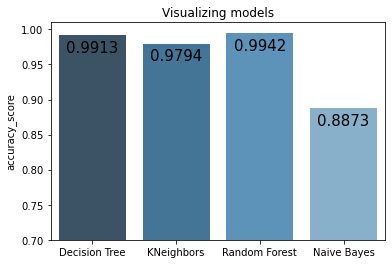

In [49]:
# creem un grafic de tip bar pentru vizualizarea scorurilor

models=['Decision Tree','KNeighbors','Random Forest','Naive Bayes' ]
ax=sns.barplot(x=models, y=[score_dtc,score_knc,score_rfc,score_nb], palette="Blues_d")

# adaugam etichete pe axe

#plt.xlabel('models')

plt.ylabel('accuracy_score')
plt.ylim(0.7, 1.01)


# adaugam titlul graficului

plt.title("Visualizing models")

#adaugam valorile pe fiecare bara/coloana
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

# vizualizam graficul

plt.show()

In [50]:
#Din toti algoritmii pe care i-am incercat, cel cu acuratea cea mai mare 
#este Random Forest Clasifiers > Decision Tree Clasifier > KNeighborsClassifier > Naives Bayes  